# **IMPORTING** **LIBRARIES**

In [16]:
# Libraries
from google.colab import files
import os
from time import time
from tqdm import tqdm
import numpy

import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms


# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **DOWNLAODING DATASET USING KAGGLE**


In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d deepcontractor/is-that-santa-image-classification

is-that-santa-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/is-that-santa-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
from torchvision import datasets 
import h5py
import torch
import torchvision.models as models

# **TRANSFORMING**

In [21]:
tfm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# **TRAINING AND TESTING**

In [22]:
# Create Dataset
TRAIN_ROOT = r"/content/is that santa/train"
TEST_ROOT = r"/content/is that santa/test"

train_ds = ImageFolder(TRAIN_ROOT, transform=tfm)
test_ds = ImageFolder(TEST_ROOT, transform=tfm)

In [23]:
# Length of Train and Test Datasets
LEN_TRAIN = len(train_ds)
LEN_TEST = len(test_ds)
print(LEN_TRAIN, LEN_TEST)

# Index Mapping
print(train_ds.class_to_idx)

614 616
{'not-a-santa': 0, 'santa': 1}


In [24]:
# Data Loader
train_loader = DataLoader(train_ds, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=30, shuffle = True)

In [25]:
# Model
model = resnet18(pretrained=True)

# Replace Output of Fully Connected Layer with Number of Labels for our Classification Problem
model.fc = Linear(in_features=512, out_features=2)
model = model.to(device)
# model = model.cuda()    # only if your system supports Nvidia CUDA
# Optimiser

In [26]:
optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

# Loss Function
loss_fn = CrossEntropyLoss()

In [12]:
for epoch in range(3):
    start = time()
    
    tr_acc = 0
    test_acc = 0
    
    # Train
    model.train()
    
    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()
            
            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()
            
            loss = loss_fn(train_prob, ytrain)
            loss.backward()
            optimiser.step()
            
            # training ends
            
            train_pred = torch.max(train_prob, 1).indices
            tr_acc += int(torch.sum(train_pred == ytrain))
            
        ep_tr_acc = tr_acc / LEN_TRAIN
    
    # Evaluate
    model.eval()
    with torch.no_grad():
        for xtest, ytest in test_loader:
            xtest = xtest.to(device)
            test_prob = model(xtest)
            test_prob = test_prob.cpu()
            
            test_pred = torch.max(test_prob,1).indices
            test_acc += int(torch.sum(test_pred == ytest))
            
        ep_test_acc = test_acc / LEN_TEST
    
    end = time()
    duration = (end - start) / 60
    
    print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTrain_acc: {ep_tr_acc}, Test_acc: {ep_test_acc}")

100%|██████████| 21/21 [02:49<00:00,  8.06s/batch]


Epoch: 0, Time: 3.8631234248479207, Loss: 0.028331054374575615
Train_acc: 0.9104234527687296, Test_acc: 0.9496753246753247


100%|██████████| 21/21 [02:46<00:00,  7.94s/batch]


Epoch: 1, Time: 3.8261954824129742, Loss: 0.019591838121414185
Train_acc: 0.9723127035830619, Test_acc: 0.9545454545454546


100%|██████████| 21/21 [02:48<00:00,  8.01s/batch]


Epoch: 2, Time: 3.791433000564575, Loss: 0.022871941328048706
Train_acc: 0.993485342019544, Test_acc: 0.9691558441558441


In [13]:
# Image Samples
sample_1 = 'is that santa/test/santa/283.Santa.jpg'
sample_2 = 'is that santa/test/santa/474.Santa.jpg'
sample_3 = 'is that santa/test/not-a-santa/340.not-a-santa.jpg'
sample_4 = 'is that santa/test/not-a-santa/58.not-a-santa.jpg'

sample_list = [sample_1,sample_2,sample_3,sample_4]

In [14]:
torch.save(model.state_dict(), 'weights.pth')

In [15]:
with h5py.File('resnet_weights.h5', 'w') as f:
    for k, v in model.state_dict().items():
        f.create_dataset(k, data=v.cpu().numpy())

### **Pytorch model performance**

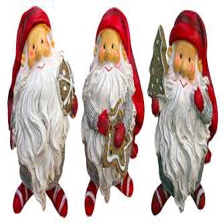

Model prediction 1, hence Santa


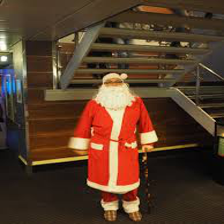

Model prediction 0, hence Not Santa


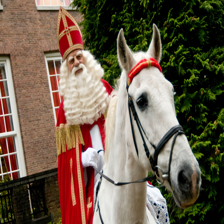

Model prediction 1, hence Santa


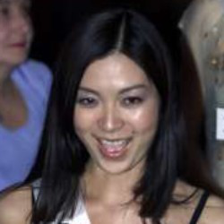

Model prediction 0, hence Not Santa


In [27]:
# Model Performance
from PIL import Image
import numpy as np

for image_path in sample_list:
    img = Image.open(image_path)
    display(img.resize((224,224)))
    img_tensor = tfm(img)
    img_tensor = img_tensor[np.newaxis, :]
    img_tensor = img_tensor.to(device)
    pred_prob = model(img_tensor)
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    if pred == 1:
        print(f"Model prediction {pred}, hence Santa")
    else:
        print(f"Model prediction {pred}, hence Not Santa")

    print("========================================================")

In [28]:
state_dict = model.state_dict()

In [32]:
import h5py
import modeci_mdf


In [33]:
  # Convert the PyTorch state_dict to a dictionary
state_dict = model.state_dict()

    # Create an HDF5 file
with h5py.File('weights.h5', 'w') as f:
  # Loop through the state_dict and store the weights in the HDF5 file
        for key, value in state_dict.items():
            # Convert the PyTorch tensor to a NumPy array
            arr = value.numpy()
            # If the array has only one element, store it as a scalar attribute
            if arr.size == 1:
                f[key] = arr.item()
                f[key].attrs['dtype'] = str(arr.dtype)
            # Otherwise, store it as an array dataset
            else:
                f.create_dataset(key, data=arr)
                f[key].attrs['dtype'] = str(arr.dtype)
        

## **PYTORCH TO MDF MODEL CREATING.JSON FILE**

In [50]:
import torchvision.models as models

import torch
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf

resnet18 = models.resnet18(pretrained=False)


def main():
    # changed import call
    from modeci_mdf.execution_engine import EvaluableGraph

    # Create some test inputs for the model
    x = torch.rand((5, 3, 224, 224))

    # Turn on eval mode for model to get rid of any randomization due to things like BatchNorm or Dropout
    resnet18.eval()

    # Run the model once to get some ground truth output (from PyTorch)
    # with torch.no_grad():
    output = resnet18(x).detach().numpy()
    # print(output)

    # Convert to MDF
    mdf_model, params_dict = pytorch_to_mdf(
        model=resnet18,
        args=(x),
        trace=True,
    )
    # Get the graph
    mdf_graph = mdf_model.graphs[0]
    # Output the model to JSON
    mdf_model.to_json_file("resnet18.json")

    

if __name__ == "__main__":
    main()


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/modeci_mdf/interfaces/pytorch/importer.py:517: FutureWarning: 'torch.onnx.symbolic_helper._set_opset_version' is deprecated in version 1.13 and will be removed in version 1.14. Please remove its usage and avoid setting internal variables directly.
  _set_opset_version(modeci_onnx_opset_version)
/usr/local/lib/python3.9/dist-packages/modeci_mdf/interfaces/pytorch/importer.py:526: FutureWarning: 'torch.onnx.symbolic_helper._set_opset_version' is deprec

In [35]:
torch.save(resnet18.state_dict(), 'resnet18.pth')

In [36]:
def image_loader(loader, image):
    image = loader(image).float()
    image = image.clone().detach().requires_grad_(True)
    image = image.unsqueeze(0)
    return image

data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

In [37]:
#using a pretrained model
sample_model = resnet18

#evaluating to get rid of randomization like dropout and batch-normalization
sample_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
image_path = "/content/is that santa/test/santa/1.Santa.jpg"
input_image = Image.open(image_path)

In [39]:
from torchvision import transforms
from torchvision.io import read_image
import torch
from PIL import Image
import torchvision.models as models
import numpy as np

from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
from modeci_mdf.execution_engine import EvaluableGraph

In [40]:
input = image_loader(data_transforms, input_image)
output = sample_model(input).detach().numpy()

## **Pytorch to MDF**

In [41]:
mdf_model, params_dict = pytorch_to_mdf(
        model=sample_model,
        args=input,
        trace=True,
    )

In [51]:
mdf_graph = mdf_model.graphs[0]
# mdf_graph_nodes = mdf_graph.nodes[id='Conv_499']
params_dict["input1"] = input.detach().numpy()

eg = EvaluableGraph(graph=mdf_graph, verbose=False)

eg.evaluate(initializer=params_dict)

output_mdf = eg.output_enodes[0].get_output()
op_label_mdf = np.argmax(output_mdf)


Init graph: ResNetGraph
Evaluating graph: ResNetGraph, root nodes: ['Conv_192'], with array format numpy


Converting MDF graph: ResNetGraph to graphviz (level: 1, format: png)
    Node: Conv_192
    Node: Relu_125
    Node: MaxPool_126
    Node: Conv_195
    Node: Relu_129
    Node: Conv_198
    Node: Add_132
    Node: Relu_133
    Node: Conv_201
    Node: Relu_136
    Node: Conv_204
    Node: Add_139
    Node: Relu_140
    Node: Conv_207
    Node: Relu_143
    Node: Conv_210
    Node: Conv_213
    Node: Add_148
    Node: Relu_149
    Node: Conv_216
    Node: Relu_152
    Node: Conv_219
    Node: Add_155
    Node: Relu_156
    Node: Conv_222
    Node: Relu_159
    Node: Conv_225
    Node: Conv_228
    Node: Add_164
    Node: Relu_165
    Node: Conv_231
    Node: Relu_168
    Node: Conv_234
    Node: Add_171
    Node: Relu_172
    Node: Conv_237
    Node: Relu_175
    Node: Conv_240
    Node: Conv_243
    Node: Add_180
    Node: Relu_181
    Node: Conv_246
    Node: Relu_184
    Node: Conv_249
    Node: Add_187
    Node: Relu_188
    Node: GlobalAveragePool_189
    Node: Flatten_190
    Nod

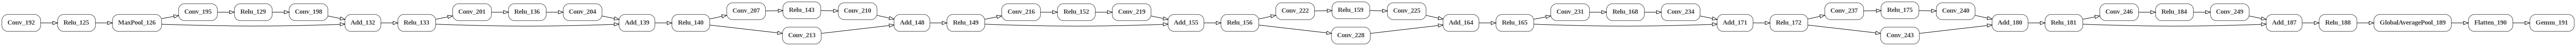

In [52]:
mdf_model.to_graph_image(
    engine="dot",
    output_format="png",
    view_on_render=False,
    level=1,
    filename_root="img1",
    only_warn_on_fail=True,
    is_horizontal = True
)
from IPython.display import Image
Image(filename="img1.png")


In [53]:
try:
    from IPython.display import Image
    onnx_graph = Image(filename="sam1.onnx.png")
    display(onnx_graph)
    
except:
    import netron
    torch.onnx.export(
            sample_model,
            input,
            "sam1.onnx",
            verbose=True,
            input_names=[],
            opset_version=9,
        )
    netron.start("sam1.onnx")

Serving 'sam1.onnx' at http://localhost:24472


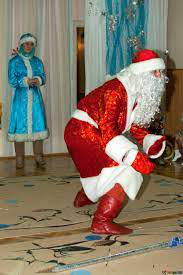

In [54]:
display(input_image)

In [55]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import onnx
import onnxruntime as rt
from torchviz import make_dot
import netron
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf



In [56]:
def main():
    # changed import call
    from modeci_mdf.execution_engine import EvaluableGraph

    # Create some test inputs for the model
    input_images = torch.zeros((1, 3, 224, 224), requires_grad=False)

    # Seed the random number generator to get deterministic behavior for weight initialization
    torch.manual_seed(0)

    model = resnet18

    model.eval()
    # Run the model once to get some ground truth outpot (from PyTorch)
    output = model(input_images)

    from modelspec.utils import _val_info

    print("Evaluated the graph in PyTorch, output: %s" % (_val_info(output)))

    # Convert to MDF
    mdf_model, params_dict = pytorch_to_mdf(
        model=model,
        args=(input_images),
        trace=True,
    )

    # Get the graph
    mdf_graph = mdf_model.graphs[0]

    # Add inputs to the parameters dict so we can feed this to the EvaluableGraph for initialization of graph input.
    params_dict["input1"] = input_images.numpy()

    # Evaluate the model via the MDF scheduler
    eg = EvaluableGraph(graph=mdf_graph, verbose=False)
    eg.evaluate(initializer=params_dict)
    output_mdf = eg.output_enodes[0].get_output()

    print("Evaluated the graph in PyTorch, output: %s" % (_val_info(output_mdf)))
    # Make sure the results are the same between PyTorch and MDF
    assert np.allclose(
        output.detach().numpy(),
        output_mdf,
    )
    print("Passed all comparison tests!")

    # Output the model to JSON
    mdf_model.to_json_file("Ptorch-mdf.json")

    import sys

    # Exporting as onnx model
    torch.onnx.export(
        model,
        input_images,
        "Ptorch-mdf.onnx",
        verbose=True,
        input_names=[],
        opset_version=9,
    )
    onnx_model = onnx.load("Ptorch-mdf.onnx")
    onnx.checker.check_model(onnx_model)
    sess = rt.InferenceSession("Ptorch-mdf.onnx")
    res = sess.run(None, {sess.get_inputs()[0].name: input_images.numpy()})
    print("Exported to MDF and ONNX")

    # export to mdf graph
    if "-graph" in sys.argv:
        mdf_model.to_graph_image(
            engine="dot",
            output_format="png",
            view_on_render=False,
            level=1,
            filename_root="Ptorch-mdf.1",
            only_warn_on_fail=True,  # Makes sure test of this doesn't fail on Windows on GitHub Actions
            is_horizontal=True,
            solid_color=True,
        )
        mdf_model.to_graph_image(
            engine="dot",
            output_format="png",
            view_on_render=False,
            level=3,
            filename_root="Ptorch-mdf",
            only_warn_on_fail=True,  # Makes sure test of this doesn't fail on Windows on GitHub Actions
            solid_color=False,
        )
    # export to PyTorch graph
    if "-graph-torch" in sys.argv:
        make_dot(output, params=dict(list(model.named_parameters()))).render(
            "Ptorch-mdf_torchviz", format="png"
        )
    # export to onnx graph
    if "-graph-onnx" in sys.argv:
        netron.start("Ptorch-mdf.onnx")


if __name__ == "__main__":
    main()



Evaluated the graph in PyTorch, output: tensor([[ 2.9529e-02, -4.2325e-02, -2.1240e-02,  1.6218e-02, -2.7082e-02,
         -2.2556e-02,  7.2972e-05,  5.9683e-03,  7.7445e-03, -1.5713e-02,
         -2.1701e-02, -1.6099e-02,  2.6612e-02,  3.4578e-02, -1.3671e-02,
          1.8974e-02, -2.9877e-02, -3.2535e-02, -9.0676e-03,  2.5408e-02,
         -1.6898e-02,  3.3333e-02,  6.0277e-03,  8.5493e-03, -1.1762e-02,
         -6.7172e-03, -1.4983e-03, -4.1809e-02, -1.8947e-02, -2.6298e-02,
          2.1858e-02,  4.3026e-02,  3.3815e-02,  2.5771e-02,  8.7355e-03,
         -3.6212e-02,  2.0240e-02,  2.5122e-02, -2.1884e-02, -4.0721e-03,
          2.1415e-02, -2.6217e-03, -2.3002e-02,  6.6738e-03, -3.3009e-02,
         -2.5336e-02, -1.5005e-03, -2.9389e-02, -3.6128e-02, -1.7146e-02,
         -1.8912e-02, -1.1027e-02, -2.0506e-02,  2.5384e-02, -4.2155e-03,
         -3.9043e-03, -2.5831e-02,  2.2694e-02,  1.6455e-02,  1.1066e-02,
          3.4482e-02,  3.7763e-02,  9.4388e-04, -8.0416e-03, -7.9236e-03

/usr/local/lib/python3.9/dist-packages/modeci_mdf/interfaces/pytorch/importer.py:517: FutureWarning: 'torch.onnx.symbolic_helper._set_opset_version' is deprecated in version 1.13 and will be removed in version 1.14. Please remove its usage and avoid setting internal variables directly.
  _set_opset_version(modeci_onnx_opset_version)
/usr/local/lib/python3.9/dist-packages/modeci_mdf/interfaces/pytorch/importer.py:526: FutureWarning: 'torch.onnx.symbolic_helper._set_opset_version' is deprecated in version 1.13 and will be removed in version 1.14. Please remove its usage and avoid setting internal variables directly.
  _set_opset_version(previous_opset_version)
/usr/local/lib/python3.9/dist-packages/modeci_mdf/interfaces/pytorch/importer.py:168: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  {aname: convert_to_serializable(node[aname]) for aname in no


Init graph: ResNetGraph
Evaluating graph: ResNetGraph, root nodes: ['Conv_192'], with array format numpy
Evaluated the graph in PyTorch, output: [[ 0.02952893 ... -0.00650799]] (NP (1, 1000) float64)
Passed all comparison tests!
Exported to MDF and ONNX


## **graph**

In [ ]:
!python sample1_pytorch_to_mdf.py -graph-torch

Evaluated the graph in PyTorch, output: tensor([[-1.5637e-02,  8.8326e-03, -1.9403e-02, -4.1525e-03, -3.7699e-02,
         -2.4221e-02,  3.0087e-02, -8.8021e-03, -1.0706e-02,  2.7092e-02,
          3.4903e-02, -9.0607e-03, -1.8693e-02, -2.2224e-02, -3.5991e-02,
          1.4403e-02, -9.7379e-03, -1.9983e-02, -1.6242e-02, -1.9412e-02,
          1.1530e-02, -9.7330e-03,  4.0849e-02,  2.5439e-02, -4.3792e-02,
          1.1160e-02,  3.5048e-02,  3.8412e-03,  3.5705e-02, -3.9840e-02,
          3.4194e-02,  4.4035e-02,  2.2902e-03,  3.6218e-03,  1.4300e-02,
          1.5837e-02,  3.7419e-02, -8.0635e-03,  3.6203e-02,  3.4503e-02,
          1.5414e-02,  3.7885e-02, -7.1840e-03, -1.0353e-02,  1.8424e-02,
         -3.3879e-02, -1.5010e-02, -3.5593e-02,  1.8628e-03,  9.1162e-04,
         -2.8998e-02,  4.2029e-02,  3.8931e-02,  1.3891e-03,  6.7063e-03,
         -3.9058e-02,  6.4488e-03, -3.7850e-02, -1.3111e-02,  1.7140e-02,
         -1.9699e-02,  3.3751e-02, -2.4072e-02,  3.0858e-03, -4.1935e-03